In [1]:
from datetime import datetime, timedelta, timezone
from IPython.display import clear_output
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import math
import time

pd.options.display.float_format = '{:,.3f}'.format

# Download data

### Fetching tickers from nasdaq and filtering out ETFs and stocks that we have a problem getting their prices

In [32]:
def get_all_tickers(etf=False):
    # Get a list of all available tickers from Yahoo Finance
    all_tickers = web.get_nasdaq_symbols()
    all_tickers = all_tickers[~all_tickers["Test Issue"]]  # Filter out stocks that we can't fetch their data for some reason

    if not etf:
        all_tickers = all_tickers[~all_tickers["ETF"]]  # Filter out ETFs
    tickers = all_tickers.index.tolist()
    return [str(ticker) for ticker in tickers if str(ticker).isalpha()]

In [33]:
def get_data(tickers_list, p="max"):
    return yf.download(tickers_list, period=p, interval="1d")

In [34]:
tickers = get_all_tickers()
# tickers = ["TSLA", "AAPL", "MSFT", "NVDA", "GOOG", "SHEL"]
data = get_data(tickers)

[                       0%%                      ]

KeyboardInterrupt: 

In [ ]:
data_cop = data.copy()

In [ ]:
new_df = pd.DataFrame(index=data_cop.index.year.unique(), columns=data_cop.columns)
new_df.drop("Adj Close", axis=1, level=0, inplace=True)
new_df.drop("Low", axis=1, level=0, inplace=True)
new_df.drop("High", axis=1, level=0, inplace=True)
new_df.drop("Open", axis=1, level=0, inplace=True)
new_df["Volume"] = data_cop["Volume"].groupby(data_cop.index.year).mean()
new_df["Close"] = data_cop["Close"].groupby(data_cop.index.year).last()
for stock in new_df["Close"].columns:
    new_df["Change", stock] = np.nan
new_df["Change"] = new_df.xs("Close", axis=1, level=0).pct_change() * 100

In [ ]:
# new_df.to_csv("Downloaded Stocks 2401.csv", index=True)

In [2]:
new_df = pd.read_csv("Downloaded Stocks 2401.csv", header=[0, 1], index_col=0)

In [9]:
new_df

Close                                                             ...  \
           A     AA  AACG   AACI  AACIU AACIW   AACT   AADI  AAGR AAGRW  ...   
Date                                                                     ...   
1962     NaN  5.469   NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN  ...   
1963     NaN  6.884   NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN  ...   
1964     NaN  6.158   NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN  ...   
1965     NaN  7.672   NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN  ...   
1966     NaN  7.847   NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN  ...   
...      ...    ...   ...    ...    ...   ...    ...    ...   ...   ...  ...   
2020 118.490 23.050 1.190    NaN    NaN   NaN    NaN 14.700   NaN   NaN  ...   
2021 159.650 59.580 1.070  9.790 10.030   NaN    NaN 24.150 7.018   NaN  ...   
2022 149.650 45.470 1.270 10.120 10.120   NaN    NaN 12.830 7.090   NaN  ...   
2023 139.030 34.000 1.160 10.770 10.810   NaN 10.440  2.020 1.250   NaN  ...   
2024 131.640 29.510 1.030 10.902 10.700 0.020 10.480  1.740 0.890 0.015  ...   

      Change                                                                \
        ZUMZ     ZUO    ZURA ZURAW    ZVIA    ZVRA    ZVSA     ZWS    ZYME   
Date                                                                         
1962     NaN     NaN     NaN   NaN     NaN     NaN     NaN     NaN     NaN   
1963     NaN     NaN     NaN   NaN     NaN     NaN     NaN     NaN     NaN   
1964     NaN     NaN     NaN   NaN     NaN     NaN     NaN     NaN     NaN   
1965     NaN     NaN     NaN   NaN     NaN     NaN     NaN     NaN     NaN   
1966     NaN     NaN     NaN   NaN     NaN     NaN     NaN     NaN     NaN   
...      ...     ...     ...   ...     ...     ...     ...     ...     ...   
2020   6.485  -2.791     NaN   NaN     NaN  84.697     NaN  21.061   3.960   
2021  30.479  34.099     NaN   NaN     NaN -22.232     NaN  -7.825 -65.320   
2022 -54.699 -65.953     NaN   NaN -41.986 -47.302     NaN -41.896 -52.044   
2023  -6.440  47.799     NaN   NaN -50.856  42.702 -98.362  39.054  32.188   
2024 -12.488  -0.213 -14.775   NaN -12.438  -9.313 -31.667  -0.816  -1.059   

              
        ZYXI  
Date          
1962     NaN  
1963     NaN  
1964     NaN  
1965     NaN  
1966     NaN  
...      ...  
2020  71.029  
2021 -25.929  
2022  53.470  
2023 -21.711  
2024   0.918  

[63 rows x 21393 columns]

In [10]:
stocks_checklist = pd.DataFrame(index=new_df["Close"].columns, columns=["Years up", "Div yield", "Sector", "avg daily vol", "Total Revenue Incr", "Gross Margin", "Gross Profit Incr", "Trading years", "Market cap", "EPS", "P/E", "Mean change"])

stocks_checklist

,Years up,Div yield,Sector,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
ZVRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZVSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZYME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
stocks_checklist = pd.DataFrame(index=new_df["Close"].columns, columns=["Years up", "Div yield", "Sector", "avg daily vol", "Total Revenue Incr", "Gross Margin", "Gross Profit Incr", "Trading years", "Market cap", "EPS", "P/E", "Mean change"])

tickers = list(new_df["Close"].columns)  # In case some of the tickers failed, this is the ticker list straight from the returned df
# Years up in a row
tmp = new_df["Change"].copy().iloc[::-1]
tmp.fillna(-1, inplace=True)
neg_year = tmp.apply(lambda x: x[x < 0].index[0] if any(x<0) else None)
current_year = tmp.index[0]
stocks_checklist["Years up"] = current_year - neg_year.copy()
# stocks_checklist["Years up"] = 1
stocks_checklist["Mean change"] = new_df["Change"].iloc[-6:-1].apply(lambda col: col.mean())
stocks_checklist["avg daily vol"] = new_df["Volume"].copy().iloc[-1:].mean()
stocks_checklist["avg daily vol"] = stocks_checklist["avg daily vol"].fillna(0)

# Eliminate by avg daily vol, so it'll be faster
stocks_checklist = stocks_checklist[stocks_checklist["avg daily vol"] > 400000]
stocks_checklist["avg daily vol"] *= new_df["Close"].iloc[-1]  # The volume in $ so penny stocks wouldn't be so damn high

print(f"0/{len(stocks_checklist.index)}")
i = 1
for ticker in stocks_checklist.index:
    stock_info = None
    stock_income = None

    clear_output(wait=True)
    print(ticker)
    print(f"{i}/{len(stocks_checklist.index)}")
    i += 1
    tmp = yf.Ticker(ticker)
    start_date = (datetime.now() - timedelta(days = 365))
    start_date = start_date.replace(tzinfo=timezone.utc)
    while True:
        try:
            stock_info = tmp.info
            stock_income = tmp.income_stmt
            stock_div = tmp.dividends
        except Exception as e:
            print(f"{e}, sleeping 10")
            time.sleep(10)
            continue
        break
    if "dividendYield" in stock_info:
        div_yield = stock_info["dividendYield"] * 100
    else:
        div_yield = np.NaN
    # Div yield
    stocks_checklist.loc[ticker, "Div yield"] = div_yield


    # Sector

    if "sector" in stock_info:
        stocks_checklist.loc[ticker, "Sector"] = stock_info["sector"]

    if "Gross Profit" in stock_income.index:
        # Average Gross margin over the last 3 income statements
        if stock_income.loc["Total Revenue"].all() > 0:
            stocks_checklist.loc[ticker, "Gross Margin"] = ((stock_income.loc["Gross Profit"].iloc[::-1] / stock_income.loc["Total Revenue"].iloc[::-1]) * 100).mean()  # Gross margin of the last 3 years
        
        # Gross profit increase percentage over the last 3 years (3 income statements)
        stocks_checklist.loc[ticker, "Gross Profit Incr"] = stock_income.loc["Gross Profit"].iloc[::-1].pct_change().mean() * 100
    
    # Total Revenue increase percentage over the last 3 years (3 income statements)
    if "Total Revenue" in stock_income.index:
        stocks_checklist.loc[ticker, "Total Revenue Incr"] = stock_income.loc["Total Revenue"].iloc[::-1].pct_change().mean() * 100
    
    # Years since IPO
    if "firstTradeDateEpochUtc" in stock_info:
        epoch = stock_info["firstTradeDateEpochUtc"]
        if epoch > 0:
            fty = datetime.fromtimestamp(stock_info["firstTradeDateEpochUtc"]).year  # First trade year
        else:
            fty = (datetime(1970, 1, 1) + timedelta(seconds=epoch)).year
        stocks_checklist.loc[ticker, "Trading years"] = current_year - fty

    # Market Cap
    if "marketCap" in stock_info:
        stocks_checklist.loc[ticker, "Market cap"] = stock_info["marketCap"]

    # P/E Compare stock's price to EPS (Earning per share)
    if "trailingEps" in stock_info:
        eps = stock_info["trailingEps"]
        stocks_checklist.loc[ticker, "EPS"] = eps
        if "Net Income" in stock_income.index:
            net_income = stock_income.loc["Net Income"][0]
            latest_close = stock_info["currentPrice"]
            stocks_checklist.loc[ticker, "P/E"] = latest_close / eps

stocks_checklist["Div yield"].replace(0.0, np.nan, inplace=True)
stocks_checklist.replace([np.inf, -np.inf], np.nan, inplace=True)

ZYME
2551/2551


In [12]:
stocks_checklist

,Years up,Div yield,Sector,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change
A,0,0.730,Healthcare,"199,302,081.476",8.836,53.029,7.477,25.000,"38,026,059,776.000",4.190,30.974,17.346
AA,0,1.340,Basic Materials,"200,934,378.492",16.662,18.948,51.186,62.000,"5,311,326,720.000",-3.650,-8.153,19.532
AADI,0,NaN,Healthcare,"760,124.804",664.371,95.613,"1,288.100",6.000,"41,939,288.000",-2.320,-0.737,-14.617
AAL,2,NaN,Industrials,"617,272,133.333",68.120,-7.712,"16,634.998",19.000,"9,103,825,920.000",2.390,5.828,-12.593
AAOI,0,NaN,Technology,"52,772,922.424",-2.254,18.153,-18.108,11.000,"628,462,400.000",-2.100,-7.900,153.604
...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,0,0.930,Healthcare,"348,627,059.312",10.202,69.732,10.655,11.000,"85,427,339,264.000",4.910,37.896,24.390
ZUO,0,NaN,Technology,"10,600,838.396",12.799,57.371,19.648,6.000,"1,317,950,976.000",-1.160,-7.940,-1.570
ZVSA,0,NaN,Healthcare,"812,550.313",NaN,NaN,NaN,2.000,"1,067,980.000",-78.430,-0.008,-98.362
ZWS,0,1.120,Industrials,"25,768,000.201",27.280,41.933,16.862,12.000,"4,942,394,880.000",0.560,51.071,10.506


In [13]:
# stocks_checklist["avg daily vol"].fillna(0, inplace=True)
stocks_checklist.to_csv("Stocks checklist 2401.csv", index=True)

In [3]:
stocks_checklist = pd.read_csv("Stocks checklist 2401.csv", index_col=0)

# Scoring

In [4]:
scores = pd.DataFrame(index=stocks_checklist.index, columns=[*stocks_checklist.columns, "Total"])  # Generate scoring dataframe

In [5]:
def total_scores(df):
    df.drop("Total", axis=1, inplace=True)
    df["Total"] = df.sum(axis=1)
    return df

### Dividend scoring

In [6]:
def div_func(x, peak1, peak2, med, sigma1, sigma2):
    f1 = (-1/(x*sigma1)) + peak2
    f2 = peak1 * np.exp(-((x-med)**2)/sigma2)
    return np.where(x < med, f2, f1)

In [7]:
peak1 = 6  # Y peak value of the first mishvaha
peak2 = 10  # Y peak value of the second mishvaha (the one where it shoef to)
starting_value = 0.4  # The score of a div yield 0

tmp = stocks_checklist["Div yield"].dropna()  # Drop no-dividend stocks
div_values = np.array(tmp.values)
div_stocks = np.array(tmp.index)
med = np.median(div_values)  # Median, to determine the peak of the first function
sigma1 = 1/(med*(peak2-peak1))  # In order for the second function to continue from where the first function stops (after the median point)
sigma2 = (med**2) / math.log(peak1/starting_value)  # Determine the slope by the starting point and peak of median
div_scores = div_func(div_values, peak1, peak2, med, sigma1, sigma2)

C:\Users\sasso\AppData\Local\Temp\ipykernel_10848\1739882789.py:2: RuntimeWarning: divide by zero encountered in divide
  f1 = (-1/(x*sigma1)) + peak2


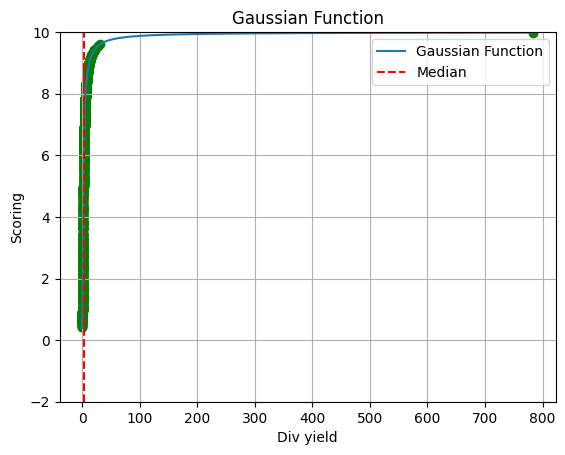

In [8]:
def plot_score(div_values, peak1, peak2, med, sigma1, sigma2):
    x_values = np.linspace(0, max(div_values), 5000)  # Generating 1000 values between 0 and 4
    y_values = div_func(x_values, peak1, peak2, med, sigma1, sigma2)
    # Calculate corresponding y values using the Gaussian function

    # Plot the function
    plt.plot(x_values, y_values, label=f'Gaussian Function')
    plt.ylim(-2, 10)  # Adjust these limits according to your needs

    plt.scatter(div_values, div_scores, color='green', marker='o')
    plt.axvline(med, color="red", linestyle="--", label="Median")
    plt.title('Gaussian Function')
    plt.xlabel('Div yield')
    plt.ylabel('Scoring')
    plt.legend()
    plt.grid(True)
plot_score(div_values, peak1, peak2, med, sigma1, sigma2)

In [9]:
scores.loc[div_stocks, "Div yield"] = div_scores

### Trading years score

In [10]:
def ty_func(values):
    # Linear
    max_years = max(values)
    f = values/(max_years/10)
    return f

In [11]:
ty_values = stocks_checklist["Trading years"]
ty_scores = ty_func(ty_values)
# ty_scores
scores["Trading years"] = ty_scores

### Years up scoring

In [12]:
def yu_func(values):  # years up func
    f = (-1/(0.1 * values) + 10)

    return np.where(values == 0, 0, np.where(values == 1, 2, f))

In [13]:
yu_values = stocks_checklist["Years up"]
yu_scores = yu_func(yu_values)
scores["Years up"] = yu_scores

### Average daily volume & Total rev incrs scoring & Gross profit incr

In [14]:
def linear_max_func(values):  # Score 10 (max) determined by max value in values
    m = 10/max(values)
    f = m*values
    return f

In [15]:
scores["avg daily vol"] = linear_max_func(stocks_checklist["avg daily vol"])

### Gross Profit Increase

In [16]:
def arctan_func(values, low, high, angle):
    high += 5
    w = 0 - math.tan(-(low*math.pi)/high - (math.pi/2))
    # f = 15*(np.arctan(values - w)/math.pi) + 2.5
    f = (high * (np.arctan(angle*values-w) + (math.pi/2)) / math.pi) + low

    return f

In [17]:
tmp = stocks_checklist["Gross Profit Incr"].dropna()
med = np.median(tmp)
low = -5
high = 10
sigma = 0.05
gross_scores = arctan_func(tmp, low, high, sigma)
scores["Gross Profit Incr"] = gross_scores


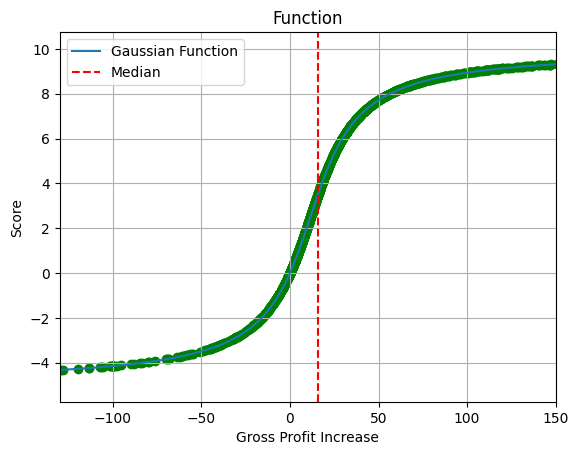

In [18]:
# Plot

x_values = np.linspace(-130, 150, 5000)  # Generating 1000 values between 0 and 4
gross_scores = arctan_func(tmp, low, high, sigma)
y_values = arctan_func(x_values, low, high, sigma)
# Calculate corresponding y values using the Gaussian function

# Plot the function
plt.plot(x_values, y_values, label=f'Gaussian Function')
# plt.ylim(-2, 10)  # Adjust these limits according to your needs
plt.xlim(-130, 150)
plt.scatter(tmp, gross_scores, color='green', marker='o')
plt.axvline(med, color="red", linestyle="--", label="Median")
plt.title('Function')
plt.xlabel('Gross Profit Increase')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
# plot_score(div_values, peak1, peak2, med, sigma1, sigma2)

### Total Rev Increase

In [19]:
tmp = stocks_checklist["Total Revenue Incr"].dropna()
med = np.median(tmp)
low = -5
high = 10
sigma = 0.05
rev_incr_scores = arctan_func(tmp, low, high, sigma)
scores["Total Revenue Incr"] = rev_incr_scores

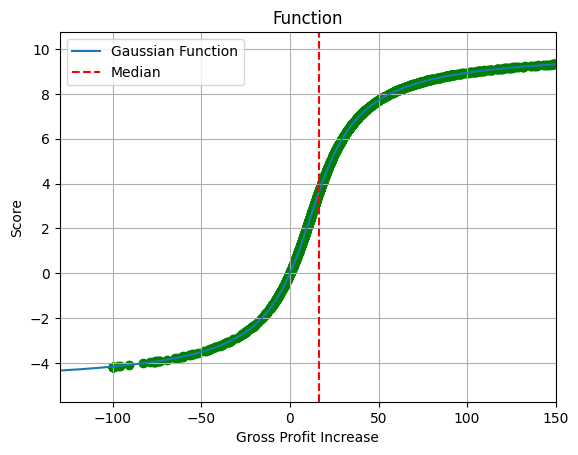

In [20]:
# Plot

x_values = np.linspace(-130, 150, 5000)  # Generating 1000 values between 0 and 4
y_values = arctan_func(x_values, low, high, sigma)
rev_incr_scores = arctan_func(tmp, low, high, sigma)
# Calculate corresponding y values using the Gaussian function

# Plot the function
plt.plot(x_values, y_values, label=f'Gaussian Function')
# plt.ylim(-2, 10)  # Adjust these limits according to your needs
plt.xlim(-130, 150)
plt.scatter(tmp, rev_incr_scores, color='green', marker='o')
plt.axvline(med, color="red", linestyle="--", label="Median")
plt.title('Function')
plt.xlabel('Gross Profit Increase')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
# plot_score(div_values, peak1, peak2, med, sigma1, sigma2)

### Gross Margin Score

In [21]:
tmp = stocks_checklist["Gross Margin"].dropna()
med = np.median(tmp)
low = -5
high = 10
sigma = 0.02
gross_margin_scores = arctan_func(tmp, low, high, sigma)
scores["Gross Margin"] = gross_margin_scores

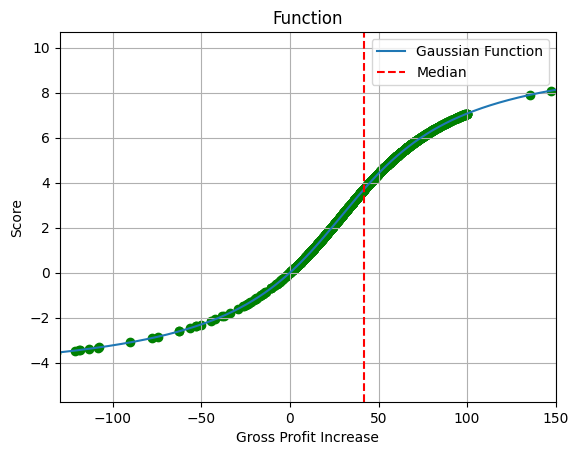

In [22]:
# Plot

x_values = np.linspace(-130, 150, 5000)  # Generating 1000 values between 0 and 4
y_values = arctan_func(x_values, low, high, sigma)

# Plot the function
plt.plot(x_values, y_values, label=f'Gaussian Function')
# plt.ylim(-2, 10)  # Adjust these limits according to your needs
plt.xlim(-130, 150)
plt.scatter(tmp, gross_margin_scores, color='green', marker='o')
plt.axvline(med, color="red", linestyle="--", label="Median")
plt.title('Function')
plt.xlabel('Gross Profit Increase')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
# plot_score(div_values, peak1, peak2, med, sigma1, sigma2)

### Get Market cap score

In [23]:
def linear_mean_func(values, med_score, med):
    # m = med_score/np.median(values)
    # sigma2 = 0.001
    m1 = med_score/med
    f1 = m1*values
    # x1 = 8/m1  # The x value when y=8 in the first function
    # f2 = -(1/(values-x1)*sigma2) + 10
    # print(x1)
    # print(m1)
    # return np.where(f1 <= 8, f1, f2)
    return np.where(f1 <= 10, f1, 10)

In [24]:
market_cap_vals = stocks_checklist["Market cap"]
market_cap_scores = linear_mean_func(market_cap_vals, 5, market_cap_vals.mean())
scores["Market cap"] = market_cap_scores

In [25]:
def plot(values, func, params=None):
    # plot_x = np.linspace(-130, 150, 5000)  # Generating 1000 values between 0 and 4
    values = values.dropna()
    plot_x = np.linspace(min(values), max(values), 5000)  # Generating 1000 values between 0 and 4
    if params:
        plot_scores = func(values, *params)
        plot_y = func(plot_x, *params)
    else:
        plot_scores = func(values)
        plot_y = func(plot_x)
    med = np.median(values)  # Median, to determine the peak of the first function
    # print(med)
    # Plot the function
    plt.plot(plot_x, plot_y, label=f'Gaussian Function')
    plt.ylim(-1, 11)  # Adjust these limits according to your needs
    plt.xlim(-1, 16)
    # plt.scatter(values, plot_scores, color='green', marker='o')
    plt.axvline(med, color="red", linestyle="--", label="Median")
    # plt.axvline(values.mean(), color="green", linestyle="--", label="Median")
    plt.title('Function')
    plt.xlabel('Values')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)

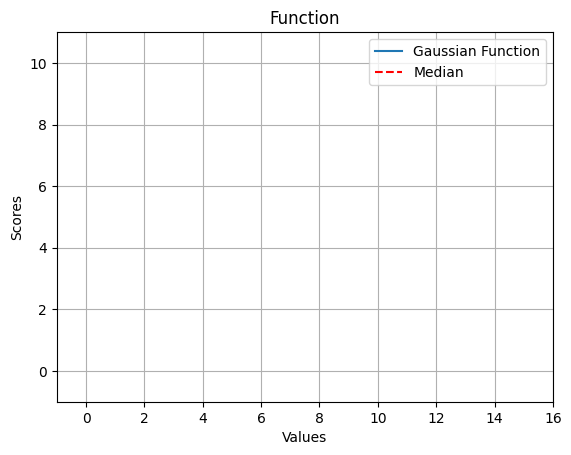

In [26]:
plot(stocks_checklist["Market cap"], linear_mean_func, [5, stocks_checklist["Market cap"].mean()])

### EPS Scoring

In [27]:
def linear_2points(values, pt1, pt2):
    # pt - tuple (x, y)
    slope = (pt1[1] - pt2[1])/(pt1[0] - pt2[0])
    f = slope*values
    return f

In [28]:
def linear_2points_zero(values, min_score, max_score):
    f1 = linear_2points(values, (0, 0), (min(values), min_score))
    f2 = linear_2points(values, (0, 0), (max(values), max_score))
    return np.where(values < 0, f1, f2)

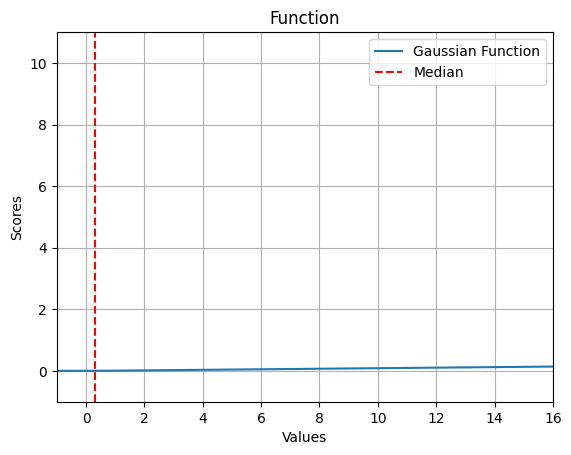

In [29]:
plot(stocks_checklist["EPS"], linear_2points_zero, [-5, 10])

In [30]:
scores["EPS"] = linear_2points_zero(stocks_checklist["EPS"], -5, 10)
scores["P/E"] = linear_2points_zero(stocks_checklist["P/E"], -5, 10)

### Mean Change % score

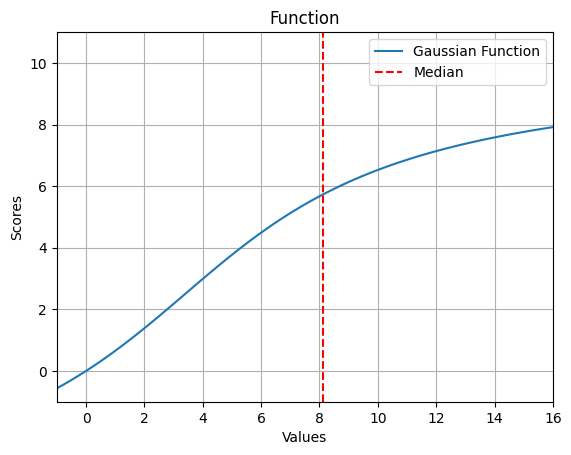

In [31]:
# stocks_checklist["Mean change"]
plot(stocks_checklist["Mean change"], arctan_func, [-5, 10, 0.17])
scores["Mean change"] = arctan_func(stocks_checklist["Mean change"], -5, 10, 0.17)

In [32]:
scores

,Years up,Div yield,Sector,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change,Total
A,0.000,1.248,NaN,0.071,1.857,4.649,1.542,4.032,8.159,0.037,0.024,8.095,NaN
AA,0.000,2.550,NaN,0.071,3.696,1.565,7.769,10.000,1.140,-0.001,-0.008,8.331,NaN
AADI,0.000,NaN,NaN,0.000,9.854,6.930,9.925,0.968,0.009,-0.001,-0.001,-3.493,NaN
AAL,5.000,NaN,NaN,0.219,8.378,-0.516,9.994,3.065,1.953,0.021,0.004,-3.317,NaN
AAOI,0.000,NaN,NaN,0.019,-0.384,1.492,-2.167,1.774,0.135,-0.001,-0.008,9.813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,0.000,1.615,NaN,0.124,2.179,5.772,2.287,1.774,10.000,0.043,0.029,8.696,NaN
ZUO,0.000,NaN,NaN,0.004,2.799,4.974,4.338,0.968,0.283,-0.000,-0.008,-0.848,NaN
ZVSA,0.000,NaN,NaN,0.000,NaN,NaN,NaN,0.323,0.000,-0.025,-0.000,-4.724,NaN
ZWS,0.000,2.020,NaN,0.009,5.683,3.720,3.740,1.935,1.061,0.005,0.039,6.700,NaN


# Total score score

In [33]:
scores_cop = scores.copy()

In [34]:
# scores = scores_cop.copy()
# scores

In [35]:
scores = scores_cop.copy()

if "Sector" in scores.columns:
    scores.drop("Sector", axis=1, inplace=True)
if "Total" in scores.columns:
    scores.drop("Total", axis=1, inplace=True)

multipliers = {"Years up": 7, "Div yield": 4, "avg daily vol": 4, "Total Revenue Incr": 5, "Gross Margin": 5, "Gross Profit Incr": 7, "Trading years": 4, "Market cap": 7, "EPS": 7, "P/E": 6, "Mean change": 7}
multiplier_max = {key: val * 10 for key, val in multipliers.items()}
for column in scores.columns:
    scores[column] *= multipliers[column]
# scores_zerod = scores.fillna(0)
# max_nan = scores.applymap(lambda x: np.nan if pd.notna(x) else 1)
tmp_scores = scores.applymap(lambda x: -1 if pd.isna(x) else 0)
tmp_scores = tmp_scores.apply(lambda col: col*(multipliers[col.name]*10))
tmp_scores = tmp_scores.sum(axis=1)
scores["Total"] = scores.sum(axis=1)
scores["Max Score"] = sum(multiplier_max.values())
scores["Max Score"] = scores["Max Score"] + tmp_scores
scores["Score"] = (scores["Total"] / scores["Max Score"]) * 100
scores.drop("Max Score", axis=1, inplace=True)
scores.drop("Total", axis=1, inplace=True)
scores

,Years up,Div yield,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change,Score
A,0.000,4.993,0.283,9.284,23.246,10.791,16.129,57.115,0.259,0.143,56.663,28.398
AA,0.000,10.201,0.285,18.478,7.825,54.382,40.000,7.978,-0.008,-0.049,58.316,31.334
AADI,0.000,NaN,0.001,49.269,34.651,69.476,3.871,0.063,-0.005,-0.004,-24.451,22.521
AAL,35.000,NaN,0.877,41.888,-2.579,69.960,12.258,13.674,0.148,0.027,-23.218,25.091
AAOI,0.000,NaN,0.075,-1.920,7.461,-15.169,7.097,0.944,-0.005,-0.047,68.692,11.377
...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,0.000,6.462,0.495,10.897,28.858,16.010,7.097,70.000,0.304,0.175,60.869,31.931
ZUO,0.000,NaN,0.015,13.993,24.869,30.363,3.871,1.980,-0.003,-0.048,-5.934,11.713
ZVSA,0.000,NaN,0.001,NaN,NaN,NaN,1.290,0.002,-0.174,-0.000,-33.070,-7.607
ZWS,0.000,8.082,0.037,28.413,18.602,26.181,7.742,7.424,0.035,0.236,46.898,22.801


In [36]:
scores.to_csv("Scores 2401.csv", index=True)

In [37]:
scores_100 = scores.copy()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
scores_100 = scores_100.apply(lambda col: (col/col.max())*100)
scores_100["Sector"] = stocks_checklist["Sector"]
scores_100

,Years up,Div yield,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change,Score,Sector
A,0.000,12.501,0.708,18.569,46.730,15.418,40.323,81.593,0.370,0.239,81.146,46.199,Healthcare
AA,0.000,25.542,0.713,36.958,15.729,77.701,100.000,11.397,-0.012,-0.081,83.514,50.976,Basic Materials
AADI,0.000,NaN,0.003,98.546,69.657,99.268,9.677,0.090,-0.007,-0.007,-35.016,36.637,Healthcare
AAL,53.125,NaN,2.192,83.783,-5.184,99.958,30.645,19.534,0.211,0.045,-33.250,40.818,Industrials
AAOI,0.000,NaN,0.187,-3.841,14.997,-21.673,17.742,1.349,-0.007,-0.079,98.373,18.509,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,0.000,16.180,1.238,21.796,58.011,22.876,17.742,100.000,0.434,0.292,87.171,51.947,Healthcare
ZUO,0.000,NaN,0.038,27.988,49.993,43.382,9.677,2.828,-0.004,-0.079,-8.498,19.055,Technology
ZVSA,0.000,NaN,0.003,NaN,NaN,NaN,3.226,0.002,-0.249,-0.000,-47.359,-12.376,Healthcare
ZWS,0.000,20.235,0.091,56.831,37.394,37.408,19.355,10.605,0.049,0.394,67.163,37.094,Industrials


In [43]:
# scores_100[scores_100["Sector"] == "Energy"]
scores_100[scores_100["Sector"] == "Real Estate"]

,Years up,Div yield,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change,Score,Sector
ABR,0.000,90.488,0.198,44.978,NaN,NaN,32.258,5.485,0.156,0.059,70.249,39.761,Real Estate
ACRE,0.000,90.784,0.016,40.497,NaN,NaN,19.355,1.172,0.005,1.296,-10.296,18.713,Real Estate
ADC,0.000,74.073,0.231,62.556,66.687,63.127,48.387,12.791,0.150,0.268,12.229,45.299,Real Estate
AGNC,0.000,91.873,0.490,-47.733,NaN,NaN,25.806,14.481,0.004,1.498,-30.568,4.160,Real Estate
AHT,0.000,NaN,0.004,79.928,6.588,-37.622,33.871,0.116,-0.021,-0.002,-45.597,-0.363,Real Estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WELL,0.000,58.930,0.642,29.109,36.964,15.434,70.968,100.000,0.047,1.267,60.228,53.911,Real Estate
WHLR,0.000,NaN,0.000,27.889,56.892,22.638,19.355,0.023,-0.154,-0.000,-3.339,17.484,Real Estate
WPC,21.250,77.454,0.291,22.728,67.663,21.927,41.935,29.893,0.322,0.135,9.182,38.692,Real Estate
WY,0.000,50.624,0.380,39.111,30.480,72.580,82.258,51.894,0.077,0.294,71.247,58.126,Real Estate


In [41]:
scores_100.to_csv("Scores 100 2501.csv", index=True)